# Project: Medical Appointment No shows

### Exploratory Analysis of patients attitude to medical appointments in a Brazilian hospital

## Introduction
**'No-shows'** is a term used to described an already scheduled but unattended medical appointment, this is a very common practice amongst people, which has led to a negative health impact amongst patients in the hospital. 

The dataset for this analysis contains 110,527 medical appointments and  its 14 associated variables (characteristics). The most important variable is that of the 'no-show' and 'SMS_received'
The assocaited variables are listed and clearly defined below;
- PatientId (unique identifier of a patient)
- AppointmentID (unique identifier of each appointment)
- Gender (male or female) 
- Appointment Day(the day of the actual appointment, when they have to visit the doctor)
- Schedule(the day someone called or registered the appointment, this is before appointment of course)
- Age (how old is the patient)
- Neighbourhood (where the appointment takes place)
- Scholarship(whether or not the patient is enrolled in Brasilian welfare program)
- SMS_received (1 or more messages sent to the patient)
- No-show (True or False)



In [1]:
#import all neccessary packages needed for this analysis
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import trunc

# Data Wrangling

The original data consist of 110,527 rows and 14 columns, namely; 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay','AppointmentDay','Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'. The initial observations are;
- I checked through the entire columns, 
- I observed no null values,neither were there any duplicated rows
- The 'Age' column has negative values, which were converted into absolute values.
- The ScheduleDay and AppointmentDay column were converted into a datetime type
- I dropped 5 columns that were irrelevant to my analysis,names:'Scholarship','Hipertension','Diabetes','Alcoholism','Handcap'.
- The 'ScheduledDay' and 'AppointmentDay' were converted to datetime
- I created and added 5 columns so as to help in my analysis, namely: 'Age Category','Week Day','Day of week','Month','Day Interval'
- Age Category : contains category of patients' age into groups; Children: 0-14, Youth:15-24, Adults:25-64, Seniors: 65 and above Categorize the age into groups; Children: 0-14, Youth:15-24, Adults:25-64, Seniors: 65 and above 
- Week Day : numeric representation of the day of the week of the appointment day from 0 being Monday to 6 being Sunday 
- Day of week : word representation of the day of the week of the appointment day, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
- Month : Monthly representation of the appointment day
- Day Interval : diffrence in days between Schedule Day and Appointment Day

### General Properties

In [2]:
#load the dataset in csv file into df;
df=pd.read_csv('C:/Users/HP/Downloads/no show appointment/no- shows appointment.csv')

In [3]:
#preview the first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# total rows and column
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Quick summary of nummeric columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#Quick summary of non-numeric columns in the dataset
df.describe(include='O')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [9]:
#check for total duplicated rows
df.duplicated().sum()

0

In [10]:
#check for total null values across the columns
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

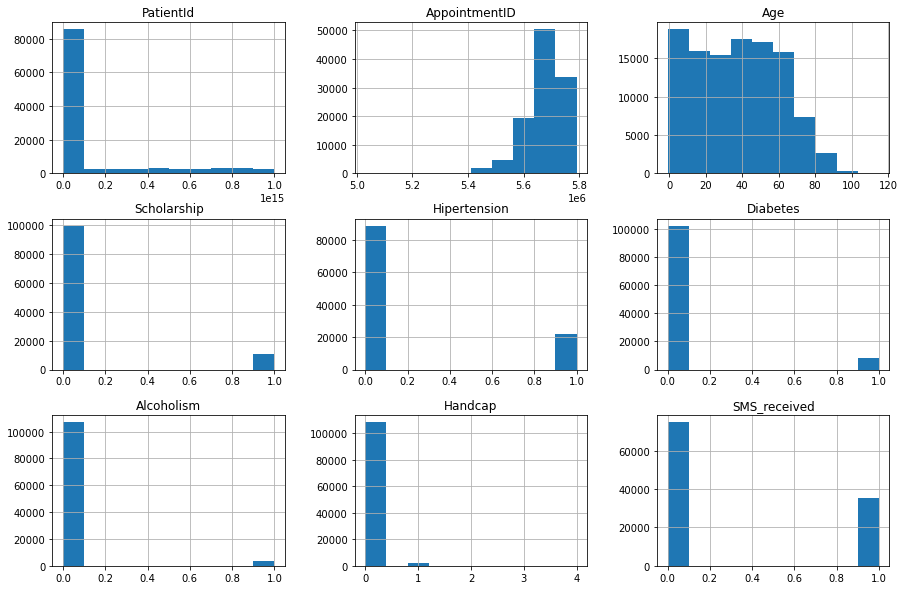

In [11]:
df.hist(figsize=(15,10))

### Data Validation

In [12]:
#convert all values in the Age column to absolute, so as to remove negative values
df['Age']= abs(df['Age'])

### Data Cleaning

In [13]:
# drop columns we wont be needing for analysis;
df.drop(['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap'],axis=1, inplace=True)

In [15]:
# replace the 'No-show' column's value 'No' and 'Yes' with 'Present' and 'Absent' respectfully
df['No-show'].replace(['No','Yes'], ['Present','Absent'], inplace=True)

In [16]:
#convert 'ScheduledDay' and 'AppointmentDay' to datetime type
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [17]:
#create new columns, 'Month','Week Day', 'Hour'
df['Month']= df['AppointmentDay'].dt.month_name()
df['Week Day']= df['AppointmentDay'].dt.weekday

In [18]:
# A new column to show the diffrences in days between scheduled date and appointment date
df['Day Interval']=(df['AppointmentDay'] - df['ScheduledDay'] ).dt.days

In [19]:
#all negative converted to zero
df['Day Interval']= np.where(df['Day Interval'] <0, 0,df['Day Interval'])

In [20]:
#replace the weekday with week names
df['Day of week']= df['Week Day'].replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [21]:
# Categorize the age into groups; Children: 0-14, Youth:15-24, Adults:25-64, Seniors: 65 and above
#defining function filter 
def filter(x):
    if x <= 14:
        return 'Children'
    if (x > 14 and x <= 24):
        return 'Youths'
    if (x > 24 and x <= 64):
        return 'Adults'
    if x > 64:
        return 'Seniors'
#applying the filter function to 'Age' column 
df['Age Category'] = df['Age'].apply(filter)

In [22]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show',
       'Month', 'Week Day', 'Day Interval', 'Day of week', 'Age Category'],
      dtype='object')

In [23]:
#reaarange the columns
df=df[['PatientId', 'AppointmentID', 'Gender','Age','Age Category', 'ScheduledDay',
       'AppointmentDay','Week Day','Day of week', 'Month','Day Interval', 'Neighbourhood', 'SMS_received', 'No-show',
       ]]

In [24]:
#confirm all changes
df

,PatientId,AppointmentID,Gender,Age,Age Category,ScheduledDay,AppointmentDay,Week Day,Day of week,Month,Day Interval,Neighbourhood,SMS_received,No-show
0,2.987250e+13,5642903,F,62,Adults,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,4,Friday,April,0,JARDIM DA PENHA,0,Present
1,5.589978e+14,5642503,M,56,Adults,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,4,Friday,April,0,JARDIM DA PENHA,0,Present
2,4.262962e+12,5642549,F,62,Adults,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,4,Friday,April,0,MATA DA PRAIA,0,Present
3,8.679512e+11,5642828,F,8,Children,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,4,Friday,April,0,PONTAL DE CAMBURI,0,Present
4,8.841186e+12,5642494,F,56,Adults,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,4,Friday,April,0,JARDIM DA PENHA,0,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,Adults,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,1,Tuesday,June,34,MARIA ORTIZ,1,Present
110523,3.596266e+12,5650093,F,51,Adults,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,1,Tuesday,June,34,MARIA ORTIZ,1,Present
110524,1.557663e+13,5630692,F,21,Youths,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,1,Tuesday,June,40,MARIA ORTIZ,1,Present
110525,9.213493e+13,5630323,F,38,Adults,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,1,Tuesday,June,40,MARIA ORTIZ,1,Present


In [25]:
df.shape

(110527, 14)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708889e+01,2.311018e+01,0.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Week Day,110527.0,1.858243e+00,1.371672e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Day Interval,110527.0,9.532739e+00,1.502773e+01,0.000000e+00,0.000000e+00,3.000000e+00,1.400000e+01,1.780000e+02
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


## Exploratory Data Analysis

### Questions 
1. **What is the percentage of peope who miss the appointment to those who didn't?**

2. **Who didnt show up more often- male or female?**

3. **What is the distribution of patients by age group in terms of no-show?**

4. **How days of the week affects appointment?**

5. **Did SMS reminder helped reduce the No-show?**

### 1. What is the percentage of peope who miss the appointment to those who didn't?

In [27]:
percentage= df['No-show'].value_counts()*100/df['No-show'].count()
percentage

Present    79.806744
Absent     20.193256
Name: No-show, dtype: float64

<AxesSubplot:title={'center':'Percentage of Present vs Absent'}>

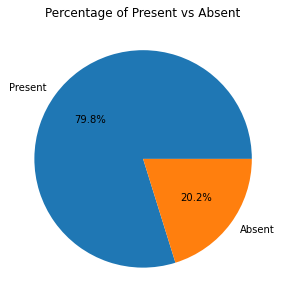

In [28]:
percentage.plot(kind='pie', autopct='%0.1f%%', figsize=(10,5), ylabel='',title='Percentage of Present vs Absent')

#### Observation:
The percentage of patients that were present for their appointments were far higher than patients that didn't show up

### 2. **Who didnt show up more often- male or female**

In [29]:
round(df['Gender'].value_counts()*100/df['Gender'].count(),0)

F    65.0
M    35.0
Name: Gender, dtype: float64

In [30]:
total_absentees= df[df['No-show']=='Absent']['Gender'].count()

In [31]:
df[df['No-show']=='Absent']['Gender'].value_counts()*100.0/total_absentees

F    65.388234
M    34.611766
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'No Show: Female Vs Male'}, xlabel='Gender', ylabel='Counts'>

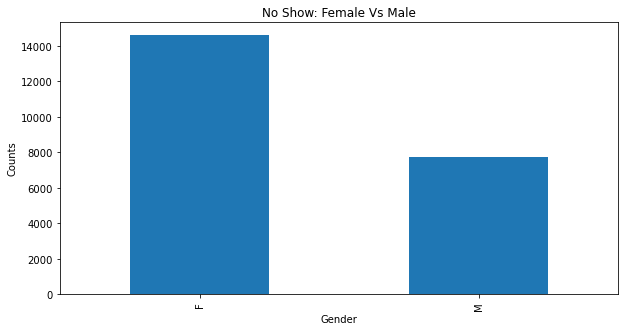

In [32]:
df[df['No-show']=='Absent']['Gender'].value_counts().plot(kind='bar', figsize=(10,5),xlabel='Gender',ylabel='Counts', title='No Show: Female Vs Male')

#### Observation:
Out of the 22,278 patients that didnt show up, 65% of the appointments were from Females and 35% were from Male.

### 3. **What is the distribution of patients by age group in terms of no-show?**

In [33]:
pd.DataFrame(df['Age Category'].value_counts())

,Age Category
Adults,58857
Children,23258
Seniors,14402
Youths,14010


In [34]:
#The sum total of patients for each age category grouped by No show
df.pivot_table(columns='No-show', index='Age Category', values='PatientId', aggfunc=[np.count_nonzero])

count_nonzero         
No-show             Absent  Present
Age Category                       
Adults             11620.0  47237.0
Children            4926.0  18332.0
Seniors             2233.0  12169.0
Youths              3540.0  10470.0

In [35]:
#calculate in percentage the total patients that were present and absent for each age category
round(df.pivot_table(columns='No-show', index='Age Category', values='PatientId',margins=True, aggfunc=[np.count_nonzero])*100/ df['PatientId'].count(), 1)

count_nonzero               
No-show             Absent Present    All
Age Category                             
Adults                10.5    42.7   53.3
Children               4.5    16.6   21.0
Seniors                2.0    11.0   13.0
Youths                 3.2     9.5   12.7
All                   20.2    79.8  100.0

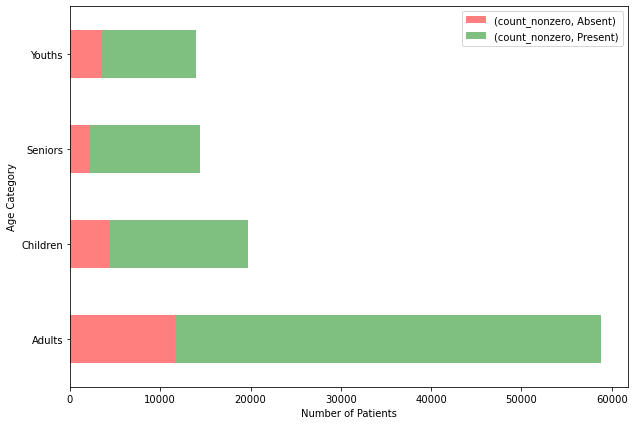

In [36]:
df.pivot_table(columns='No-show', index='Age Category', values='Age', aggfunc=[np.count_nonzero]).plot(kind='barh', stacked=True, figsize=(10,7),alpha=0.5, color=['Red','Green'])
plt.xlabel('Number of Patients')

plt.legend()

#### observations:
- The Adults had the highest overall population in the hospital(53.3%), while the Youths had the least(12.7%)... it is safe to say there are healthy youths in the community!
- Seniors had the lowest number of people who didn't show up(2.0%), while Adults had the highest(10.5%)
- Although Adults tends to lead the table in terms of absentees, suprisingly they showed up the most by age category in the hospital(42.7%)

### 4.How days of the week affects appointment?

In [37]:
df.groupby(['Week Day', 'Day of week'])['No-show'].count()

Week Day  Day of week
0         Monday         22715
1         Tuesday        25640
2         Wednesday      25867
3         Thursday       17247
4         Friday         19019
5         Saturday          39
Name: No-show, dtype: int64

In [38]:
df.pivot_table(columns='No-show',index=['Week Day', 'Day of week'], values='PatientId', aggfunc=[np.count_nonzero])

count_nonzero         
No-show                     Absent  Present
Week Day Day of week                       
0        Monday             4690.0  18025.0
1        Tuesday            5152.0  20488.0
2        Wednesday          5093.0  20774.0
3        Thursday           3338.0  13909.0
4        Friday             4037.0  14982.0
5        Saturday              9.0     30.0

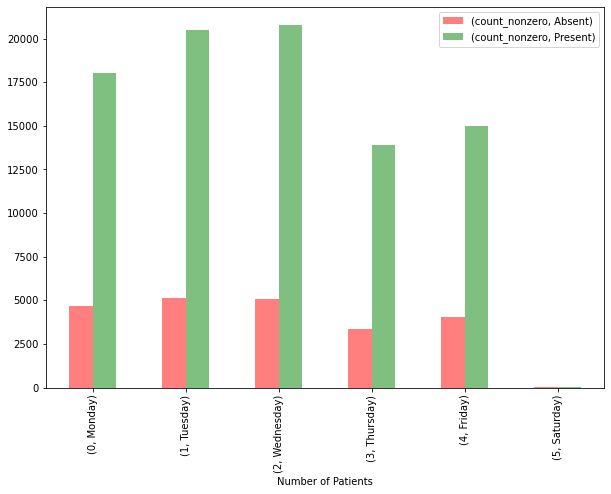

In [39]:
df.pivot_table(columns='No-show',index=['Week Day', 'Day of week'], values='PatientId', aggfunc=[np.count_nonzero]).plot(kind='bar', stacked=False, figsize=(10,7),alpha=0.5, color=['Red','Green'])
plt.xlabel('Number of Patients')

plt.legend()

#### observations:
- The clinic doesn't operate on Sundays.
- Saturdays was the least in terms of patients' population, this could infer that only emergency cases are treated on Saturdays.
- The population of absentees seems to be consistent from Mondays to Fridays.
- The busiest days are Tuesdays, closely followed by Wednesdays and Mondays, in that order.

### 5.Did SMS reminder helped reduce the No-show?

In [40]:
#focusing on the first 10 days 
df.pivot_table(values='PatientId',columns=['SMS_received','No-show'], index='Day Interval', aggfunc=[np.count_nonzero], margins=True).head(11)

count_nonzero                                 
SMS_received             0               1              All
No-show             Absent  Present Absent Present         
Day Interval                                               
0                   2910.0  40871.0    NaN     NaN  43781.0
1                   1602.0   5123.0    NaN     NaN   6725.0
2                    451.0   1380.0  193.0   713.0   2737.0
3                    545.0   1691.0  686.0  2368.0   5290.0
4                    367.0    856.0  505.0  1549.0   3277.0
5                    378.0    975.0  623.0  2061.0   4037.0
6                    572.0   1484.0  737.0  2113.0   4906.0
7                    265.0    627.0  405.0  1035.0   2332.0
8                    174.0    434.0  266.0   731.0   1605.0
9                    244.0    449.0  196.0   502.0   1391.0
10                   172.0    333.0  140.0   342.0    987.0

In [41]:
round(df.pivot_table(values='PatientId',columns=['SMS_received','No-show'], index='Day Interval', aggfunc=[np.count_nonzero], margins=True).head(11)*100/df['PatientId'].count(),1)

count_nonzero                             
SMS_received             0              1           All
No-show             Absent Present Absent Present      
Day Interval                                           
0                      2.6    37.0    NaN     NaN  39.6
1                      1.4     4.6    NaN     NaN   6.1
2                      0.4     1.2    0.2     0.6   2.5
3                      0.5     1.5    0.6     2.1   4.8
4                      0.3     0.8    0.5     1.4   3.0
5                      0.3     0.9    0.6     1.9   3.7
6                      0.5     1.3    0.7     1.9   4.4
7                      0.2     0.6    0.4     0.9   2.1
8                      0.2     0.4    0.2     0.7   1.5
9                      0.2     0.4    0.2     0.5   1.3
10                     0.2     0.3    0.1     0.3   0.9

Text(0.5, 1.0, 'Patients population in terms of No show and SMS receieved')

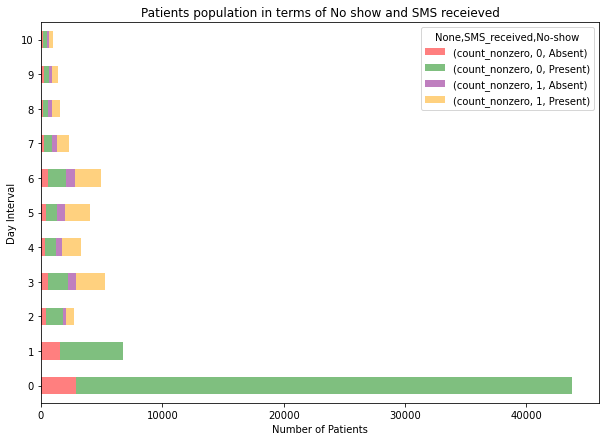

In [42]:
df.pivot_table(values='PatientId',columns=['SMS_received','No-show'], index='Day Interval', aggfunc=[np.count_nonzero]).head(11).plot(kind='barh', stacked=True, figsize=(10,7),alpha=0.5, color=['Red','Green','Purple','Orange'])
plt.xlabel('Number of Patients')
plt.title('Patients population in terms of No show and SMS receieved')

#### Observations:
- Most patients had their appointments on the same day it was scheduled(37%)
- No SMS were sent on the day and the day after missing appointments
- SMS were sent from the second day after missing appointments
- People who received SMS and were present surmounted to about 50% of the entire population for each day

### Conclusion
- The patients registered at the hospital predominatly female accounting to more than 70% of total patients.
- Although Females accounted for most patients in the hospital, 65% of absentees were females
- The Adults had the highest overall population in the hospital, while the Youths had the least... it is safe to say there are healthy youths in the community!
- Seniors had the lowest number of people who didn't show up while Adults had the highest
- The clinic doesn't operate on Sundays.
- Saturdays was the least in terms of patients' population, this could infer that only emergency cases are treated on Saturdays.
- The population of absentees seems to be consistent from Mondays to Fridays.
- The busiest days are Tuesdays, closely followed by Wednesdays and Mondays, in that order.
- Most patients had their appointments on the same day it was scheduled
- No SMS were sent on the day and the day after missing appointments
- The number of Present patients who had missed their initial appointment date increased upon sending SMS.